### With the recent introduction of **Netflix’s household** plan, I aimed to analyze its impact on revenue and ARPU. Using Netflix’s quarterly ARPU, revenue, and membership data, I developed time series forecasting models to uncover revenue dynamics, regional trends, and growth patterns across global markets.

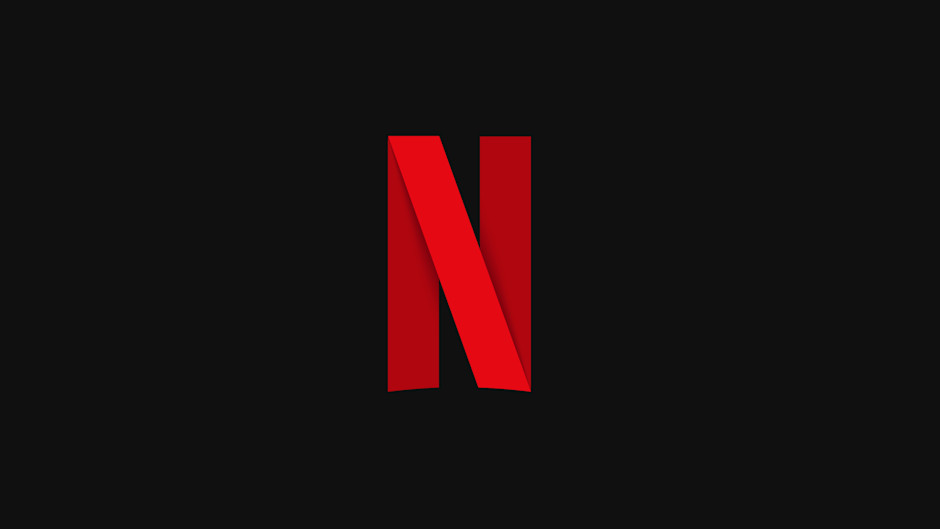

In [2]:
from IPython.display import Image
Image(filename='/Users/snehanarayanan/Documents/subscription_log project/BrandAssets_Logos_02-NSymbol.jpg')

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [71]:
df=pd.read_csv('/Users/snehanarayanan/Documents/subscription_log project/netflix_revenue_updated-3.csv')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            32 non-null     object 
 1   Global Revenue                  32 non-null     int64  
 2   UCAN Streaming Revenue          32 non-null     int64  
 3   EMEA Streaming Revenue          32 non-null     int64  
 4   LATM Streaming Revenue          32 non-null     int64  
 5   APAC Streaming Revenue          32 non-null     int64  
 6   UCAN Members                    32 non-null     int64  
 7   EMEA  Members                   32 non-null     int64  
 8   LATM Members                    32 non-null     int64  
 9   APAC Members                    32 non-null     int64  
 10  UCAN ARPU                       32 non-null     float64
 11  EMEA ARPU                       32 non-null     float64
 12  LATM  ARPU                      32 non

In [4]:
df.tail()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
19,31/12/23,8832825000,3594791000,2783530000,1156023000,962715000,80128000,88813000,45997000,45338000,16.64,10.75,8.60,7.31,260276000
20,31/03/24,9370440000,4224315000,2958153000,1165008000,1022924000,82658000,91729000,47720000,47495000,17.30,10.92,8.29,7.35,269602000
21,30/06/24,9559310000,4295560000,3007772000,1204145000,1051833000,84109000,93964000,49250000,50324000,17.17,10.80,8.28,7.17,277647000
22,30/09/24,9824703000,4322476000,3133466000,1240892000,1127869000,84803000,96131000,49182000,52604000,17.06,10.99,8.40,7.31,282720000
23,31/12/24,10246513000,4517018000,3287604000,1229771000,1212120000,89625000,101133000,53327000,57541000,17.26,11.11,8.00,7.34,301626000


In [73]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%y")

In [74]:
df.head()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,2017-03-31,2516241000,1586167000,482282000,331453000,116339000,54575000,19699000,15425000,4664000,9.84,8.57,7.46,8.81,NaN
1,2017-06-30,2670727000,1624397000,533098000,381459000,131773000,55617000,21152000,17013000,5254000,9.83,8.70,7.84,8.86,NaN
2,2017-09-30,2874645000,1674308000,614707000,434637000,150993000,56779000,23135000,18267000,5842000,9.93,9.25,8.21,9.07,NaN
3,2017-12-31,3180603000,1775987000,732726000,495067000,176823000,58422000,26004000,19717000,6501000,10.28,9.94,8.69,9.55,NaN
4,2018-03-31,3602105000,1976157000,886649000,540182000,199117000,60909000,29339000,19717000,6501000,11.04,10.68,8.79,9.55,NaN


In [17]:
df_prophet = df[['UCAN ARPU']].reset_index()
df_prophet.rename(columns={'Date': 'ds', 'UCAN ARPU': 'y'}, inplace=True)

# Prepare the data for XGBoost - using Date as feature
df['Date'] = df['Date'].map(lambda x: x.toordinal())  # Convert to ordinal for XGBoost (numeric representation of date)

# Create feature and target for XGBoost model
X = df[['Date']]  # Feature: Date (ordinal)
y = df['UCAN ARPU'] 

## XGBoost

In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgboost = xgboost_model.predict(X_test)

# Calculate the MAE and MSE for XGBoost
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)

print(f"XGBoost MAE: {mae_xgboost}")
print(f"XGBoost MSE: {mse_xgboost}")


XGBoost MAE: 0.8142524108886725
XGBoost MSE: 0.7195509886380158


## FB Prophet Model

In [18]:
df.head()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,737149,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,737240,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,737332,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,737424,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,737515,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000


In [75]:
# Ensure original 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Prepare df_prophet properly
df_prophet = df[['Date', 'UCAN ARPU']].copy()
df_prophet.rename(columns={'Date': 'ds', 'UCAN ARPU': 'y'}, inplace=True)

# Check columns
print(df_prophet.dtypes)

ds    datetime64[ns]
y            float64
dtype: object


In [76]:
df_prophet.head()

,ds,y
0,2017-03-31,9.84
1,2017-06-30,9.83
2,2017-09-30,9.93
3,2017-12-31,10.28
4,2018-03-31,11.04


In [77]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)

# Forecast 4 quarters
future = model.make_future_dataframe(periods=4, freq='Q')
forecast = model.predict(future)

# Extract Q1 2025 prediction
q1_2025_pred = forecast[forecast['ds'] == '2025-03-31']['yhat'].values[0]
print(f"Predicted UCAN ARPU for Q1 2025 (Prophet): ${q1_2025_pred:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Predicted UCAN ARPU for Q1 2025 (Prophet): $17.84


/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


In [78]:
future = model.make_future_dataframe(periods=4, freq='Q')
forecast = model.predict(future)

forecast_2025 = forecast[forecast['ds'].dt.year == 2025][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print("Forecasted UCAN ARPU for 2025:")
print(forecast_2025)

Forecasted UCAN ARPU for 2025:
           ds       yhat  yhat_lower  yhat_upper
32 2025-03-31  17.838103   17.545189   18.134698
33 2025-06-30  18.000356   17.710993   18.309349
34 2025-09-30  18.031597   17.739118   18.330266
35 2025-12-31  18.074123   17.783474   18.371467


/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


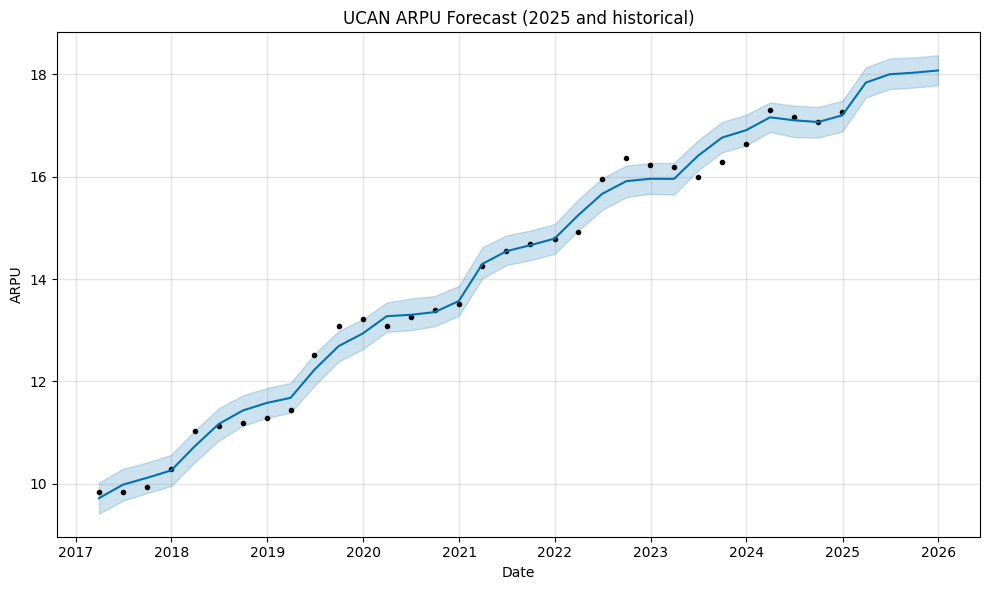

In [79]:
model.plot(forecast)
plt.title("UCAN ARPU Forecast (2025 and historical)")
plt.xlabel("Date")
plt.ylabel("ARPU")
plt.tight_layout()
plt.show()

In [101]:
df_prophet

,ds,y
0,2017-03-31,1586167000
1,2017-06-30,1624397000
2,2017-09-30,1674308000
3,2017-12-31,1775987000
4,2018-03-31,1976157000
5,2018-06-30,2049546000
6,2018-09-30,2094850000
7,2018-12-31,2160979000
8,2019-03-31,2256851000
9,2019-06-30,2501199000


In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Fit Prophet
from prophet import Prophet
model = Prophet()
model.fit(df_prophet)  # df_actual has columns 'ds' and 'y'

# Create future dataframe
future = model.make_future_dataframe(periods=4, freq='Q')

# Forecast
forecast = model.predict(future)

# Merge forecast and actuals on 'ds'
merged = pd.merge(forecast[['ds', 'yhat']], df_prophet[['ds', 'y']], on='ds', how='inner')

# Calculate metrics
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])

print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape*100:.2f}%')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


MAE: 63344104.52, RMSE: 82115297.21, MAPE: 2.16%


## ARIMA

In [80]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%y")
df = df[['Date', 'UCAN ARPU']].dropna()
df.set_index('Date', inplace=True)

In [81]:
df

,UCAN ARPU
Date,
2017-03-31,9.84
2017-06-30,9.83
2017-09-30,9.93
2017-12-31,10.28
2018-03-31,11.04
2018-06-30,11.13
2018-09-30,11.18
2018-12-31,11.28
2019-03-31,11.45


In [82]:
# Fit ARIMA(1,1,1) model
model_arima = ARIMA(df['UCAN ARPU'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Forecast next 4 quarters
forecast_arima = model_arima_fit.forecast(steps=4)
forecast_arima.index = pd.date_range(start=df.index[-1] + pd.offsets.QuarterEnd(), periods=4, freq='Q')

/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/73/0dj9qt2j6q55d7g3pl3ldw8h0000gn/T/ipykernel_66303/1906866506.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_arima.index = pd.date_range(start=df.index[-1] + pd.offsets.QuarterEnd(), periods=4, freq='Q')


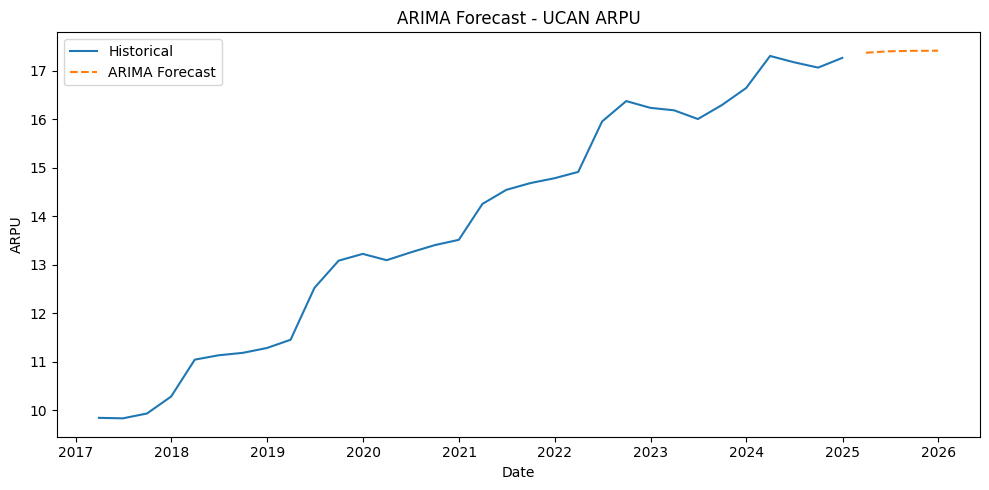

In [83]:
# Plot ARIMA forecast
plt.figure(figsize=(10,5))
plt.plot(df.index, df['UCAN ARPU'], label='Historical')
plt.plot(forecast_arima.index, forecast_arima.values, label='ARIMA Forecast', linestyle='--')
plt.title("ARIMA Forecast - UCAN ARPU")
plt.legend()
plt.xlabel("Date")
plt.ylabel("ARPU")
plt.tight_layout()
plt.show()

# XGBOOST

In [84]:
df_xgb = df.copy()
for lag in range(1, 5):
    df_xgb[f'lag_{lag}'] = df_xgb['UCAN ARPU'].shift(lag)

df_xgb.dropna(inplace=True)

# Define X and y
X = df_xgb.drop(columns='UCAN ARPU')
y = df_xgb['UCAN ARPU']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=4)

# Fit XGBoost regressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
# Predict next 4 quarters recursively
last_known = X.iloc[-1].values.reshape(1, -1)
forecast_xgb = []

for _ in range(4):
    pred = model_xgb.predict(last_known)[0]
    forecast_xgb.append(pred)
    # Shift and update lag features
    last_known = np.roll(last_known, 1)
    last_known[0, 0] = pred

# Forecast dates
forecast_xgb_index = pd.date_range(start=df.index[-1] + pd.offsets.QuarterEnd(), periods=4, freq='Q')

/var/folders/73/0dj9qt2j6q55d7g3pl3ldw8h0000gn/T/ipykernel_66303/3265265737.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_xgb_index = pd.date_range(start=df.index[-1] + pd.offsets.QuarterEnd(), periods=4, freq='Q')


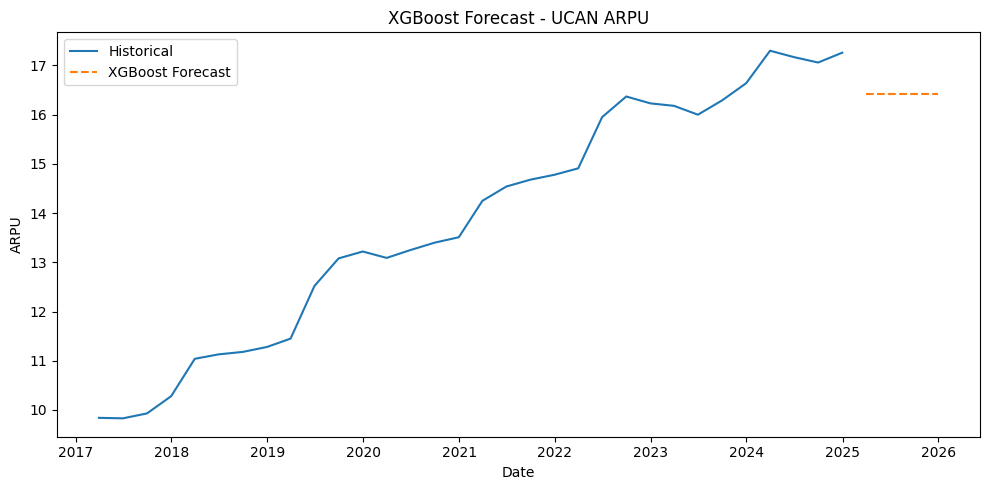

In [86]:
# Plot XGBoost forecast
plt.figure(figsize=(10,5))
plt.plot(df.index, df['UCAN ARPU'], label='Historical')
plt.plot(forecast_xgb_index, forecast_xgb, label='XGBoost Forecast', linestyle='--')
plt.title("XGBoost Forecast - UCAN ARPU")
plt.legend()
plt.xlabel("Date")
plt.ylabel("ARPU")
plt.tight_layout()
plt.show()

In [87]:
forecast_combined = pd.DataFrame({
    'Date': forecast_arima.index,
    'ARIMA Forecast': forecast_arima.values,
    'XGBoost Forecast': forecast_xgb
})

print(forecast_combined)

        Date  ARIMA Forecast  XGBoost Forecast
0 2025-03-31       17.366613         16.414667
1 2025-06-30       17.396998         16.414667
2 2025-09-30       17.405658         16.414667
3 2025-12-31       17.408126         16.414667


In [88]:
# Prophet forecast for 2025 (example values)
prophet_forecast = [17.732772, 18.174710, 18.308758 , 18.309168]  # Replace with your actual values from model.predict()

# Add Prophet values to the DataFrame
forecast_combined['Prophet Forecast'] = prophet_forecast

# Add actual value for Q1 2025 (assume known)
forecast_combined['Actual'] = 17.26  # actual UCAN ARPU for Q1 2025

# Calculate % error for each model for Q1 only
forecast_combined['ARIMA % Error'] = abs((forecast_combined['ARIMA Forecast'] - forecast_combined['Actual']) / forecast_combined['Actual']) * 100
forecast_combined['XGBoost % Error'] = abs((forecast_combined['XGBoost Forecast'] - forecast_combined['Actual']) / forecast_combined['Actual']) * 100
forecast_combined['Prophet % Error'] = abs((forecast_combined['Prophet Forecast'] - forecast_combined['Actual']) / forecast_combined['Actual']) * 100


In [89]:
forecast_combined

,Date,ARIMA Forecast,XGBoost Forecast,Prophet Forecast,Actual,ARIMA % Error,XGBoost % Error,Prophet % Error
0,2025-03-31,17.366613,16.414667,17.732772,17.26,0.617686,4.897641,2.739119
1,2025-06-30,17.396998,16.414667,18.174710,17.26,0.793732,4.897641,5.299594
2,2025-09-30,17.405658,16.414667,18.308758,17.26,0.843906,4.897641,6.076234
3,2025-12-31,17.408126,16.414667,18.309168,17.26,0.858206,4.897641,6.078610


### Forecasting for Q1 2025

In [91]:
# Load and preprocess
df = pd.read_csv("/Users/snehanarayanan/Documents/subscription_log project/netflix_revenue_updated-3.csv")
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%y")


In [105]:
df = df[['Date', 'UCAN Streaming Revenue']].dropna()

In [106]:
actual_q1_2025_revenue = 4617.09

In [107]:
# Prophet format
df_prophet = df.rename(columns={'Date': 'ds', 'UCAN Streaming Revenue': 'y'})

# Fit Prophet
from prophet import Prophet
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=4, freq='Q')
forecast = model.predict(future)
q1_2025_prophet = forecast[forecast['ds'] == '2025-03-31']['yhat'].values[0]

/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
INFO:cmdstanpy:start chain 1
INFO:cmd

In [108]:
df.set_index('Date', inplace=True)
model_arima = ARIMA(df['UCAN Streaming Revenue'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=4)
q1_2025_arima = forecast_arima.iloc[0]

/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/snehanarayanan/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

In [109]:
df_xgb = df.copy()
for lag in range(1, 5):
    df_xgb[f'lag_{lag}'] = df_xgb['UCAN Streaming Revenue'].shift(lag)
df_xgb.dropna(inplace=True)

X = df_xgb.drop(columns='UCAN Streaming Revenue')
y = df_xgb['UCAN Streaming Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=4)

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model_xgb.fit(X_train, y_train)

last_known = X.iloc[-1].values.reshape(1, -1)
forecast_xgb = []
for _ in range(4):
    pred = model_xgb.predict(last_known)[0]
    forecast_xgb.append(pred)
    last_known = np.roll(last_known, 1)
    last_known[0, 0] = pred
q1_2025_xgb = forecast_xgb[0]

In [110]:
results = pd.DataFrame({
    'Model': ['Prophet', 'ARIMA', 'XGBoost'],
    'Q1 2025 Forecast': [q1_2025_prophet, q1_2025_arima, q1_2025_xgb],
    'Actual Q1 2025 Revenue': [actual_q1_2025_revenue] * 3
})
results['% Error'] = abs((results['Q1 2025 Forecast'] - results['Actual Q1 2025 Revenue']) / results['Actual Q1 2025 Revenue']) * 100
results['Q1 2025 Forecast'] = results['Q1 2025 Forecast'] / 1e6
print("\n Forecast Comparison for Q1 2025 UCAN Revenue:\n")
print(results)


 Forecast Comparison for Q1 2025 UCAN Revenue:

     Model  Q1 2025 Forecast  Actual Q1 2025 Revenue       % Error
0  Prophet       4457.885384                 4617.09  9.655174e+07
1    ARIMA       4608.101775                 4617.09  9.980523e+07
2  XGBoost       3734.304768                 4617.09  8.087995e+07


In [111]:
# Actual known Q1 2025 revenue
actual_q1_2025_revenue = 4617.09

# Combine all model forecasts into a DataFrame
forecast_revenue_q1 = pd.DataFrame({
    'Model': ['Prophet', 'ARIMA', 'XGBoost'],
    'Forecasted Revenue': [q1_2025_prophet, q1_2025_arima, q1_2025_xgb]
})

# Add actual revenue and calculate % error
forecast_revenue_q1['Actual Revenue'] = actual_q1_2025_revenue
forecast_revenue_q1['% Error'] = abs((forecast_revenue_q1['Forecasted Revenue'] - actual_q1_2025_revenue) / actual_q1_2025_revenue) * 100

# Display
print(forecast_revenue_q1)

     Model  Forecasted Revenue  Actual Revenue       % Error
0  Prophet        4.457885e+09         4617.09  9.655174e+07
1    ARIMA        4.608102e+09         4617.09  9.980523e+07
2  XGBoost        3.734305e+09         4617.09  8.087995e+07
